# 🚢 Desafio Pandas - Analisando o Titanic

Neste projeto, você será um **cientista de dados** e irá explorar um conjunto de dados real do Titanic.
O objetivo é responder a perguntas importantes sobre os passageiros e encontrar padrões interessantes.

---
### 🔍 Como funciona?
- O conjunto de dados já está carregado para você.
- Leia as instruções e tente responder a cada desafio explorando os dados.
- Não se preocupe se não lembrar todos os comandos exatos! Consulte suas anotações e o material de referência.
- O objetivo é **pensar e testar hipóteses** sobre os passageiros do Titanic.

Boa sorte! 🚀


In [1]:
import pandas as pd
import seaborn as sns

# Carregar dataset do Titanic
df = sns.load_dataset("titanic")

# Exibir as primeiras linhas para se familiarizar com os dados
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 📝 Desafio 1: Explore os dados

1. **Quais informações gerais podemos obter sobre os dados?**  
   - Qual o tamanho do dataset?  
   - Quais colunas estão disponíveis?  
   - Que tipo de dados cada coluna contém?  

2. **Quais são as principais estatísticas descritivas desse conjunto de dados?**  
   - Qual a média de idade dos passageiros?  
   - Qual o preço médio pago pela passagem?


In [8]:
print(df.shape) # Impressão do número de linhas e colunas

(891, 15)


In [ ]:
df.describe() # Estatísticas descritivas


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
df.columns #colunas disponíveis

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [4]:
df.info() #tipos de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
len(df) #Tamanho do dataset

891

In [6]:
df.count()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

In [7]:
#média de idade dos passageiros

print(df['age'].mean() )
print()
print()

print(df.describe()['age'])

29.69911764705882


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64


In [ ]:
#preço médio pago pela passagem
df['fare'].mean()

32.204207968574636

## 📝 Desafio 2: Quem eram os passageiros do Titanic?

1. **Havia mais homens ou mulheres a bordo?**  
2. **Qual era a distribuição de passageiros por classe?**  
3. **A maioria dos passageiros sobreviveu ou não?**  


In [ ]:
#Havia mais homens ou mulheres a bordo?

df['sex'].value_counts()

,count
sex,
male,577
female,314


In [ ]:
#Distribuição de passageiros por classe

df['pclass'].value_counts()

,count
pclass,
3,491
1,216
2,184


In [ ]:
#A maioria dos passageiros sobreviveu ou não?

df['survived'].value_counts()

,count
survived,
0,549
1,342


## 📝 Desafio 3: Quem eram os passageiros mais ricos? 💰

1. **Liste os passageiros que pagaram mais de 250 pela passagem.**  
2. **Quantos desses passageiros estavam na primeira classe?**  
3. **Quantos deles sobreviveram?**  


In [12]:
#Liste os passageiros que pagaram mais de 250 pela passagem

df_mais_250 = df[df['fare'] > 250]
df_mais_250


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
88,1,1,female,23.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
311,1,1,female,18.0,2,2,262.3750,C,First,woman,False,B,Cherbourg,yes,False
341,1,1,female,24.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
438,0,1,male,64.0,1,4,263.0000,S,First,man,True,C,Southampton,no,False
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True
742,1,1,female,21.0,2,2,262.3750,C,First,woman,False,B,Cherbourg,yes,False


In [13]:
len(df_mais_250) #quantidade de passageiros que pagaram mais de 250

9

In [15]:
df_mais_250['survived'].value_counts()

survived
1    7
0    2
Name: count, dtype: int64

In [ ]:
df[(df['fare'] > 250) & (df['pclass'] == 1)] #pagou mais de 250 e estava na primeira classe
# se puxarmos o len saberemos quantos passageiros pagaram mais de 250 e estavam na primeira classe 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
88,1,1,female,23.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
311,1,1,female,18.0,2,2,262.3750,C,First,woman,False,B,Cherbourg,yes,False
341,1,1,female,24.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
438,0,1,male,64.0,1,4,263.0000,S,First,man,True,C,Southampton,no,False
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True
742,1,1,female,21.0,2,2,262.3750,C,First,woman,False,B,Cherbourg,yes,False


In [8]:
df[(df['fare'] > 250) & (df['pclass'] == 1) & (df['survived'] == 1)] #pagou mais de 250 e estava na primeira classe e sobreviveu

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
88,1,1,female,23.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
311,1,1,female,18.0,2,2,262.3750,C,First,woman,False,B,Cherbourg,yes,False
341,1,1,female,24.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True
742,1,1,female,21.0,2,2,262.3750,C,First,woman,False,B,Cherbourg,yes,False


In [10]:
df['sibsp'].value_counts() #distribuição de passageiros por número de irmãos/cônjuges a bordo

sibsp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [11]:
df['survived'].value_counts() #distribuição de passageiros por sobrevivência

survived
0    549
1    342
Name: count, dtype: int64

In [9]:
#Contagem de homens e mulheres
df['sex'].value_counts() 

sex
male      577
female    314
Name: count, dtype: int64

## 📝 Desafio 4: Existe relação entre idade e classe dos passageiros?

1. **Qual era a idade média dos passageiros em cada classe?**  
2. **Os passageiros da terceira classe eram mais jovens que os da primeira?**  


In [25]:
#Qual a idade média dos passageiros em cada classe?
df.groupby('pclass')['age'].mean()

pclass
1    38.233441
2    29.877630
3    25.140620
Name: age, dtype: float64

array([[<Axes: title={'center': 'age'}>]], dtype=object)

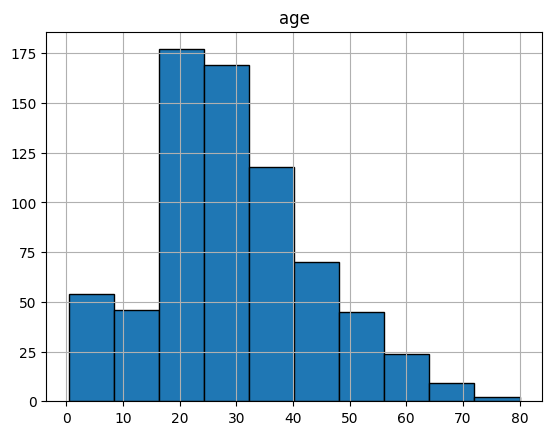

In [27]:
df.hist('age', ec='black') #histograma de idades

array([[<Axes: title={'center': 'age'}>]], dtype=object)

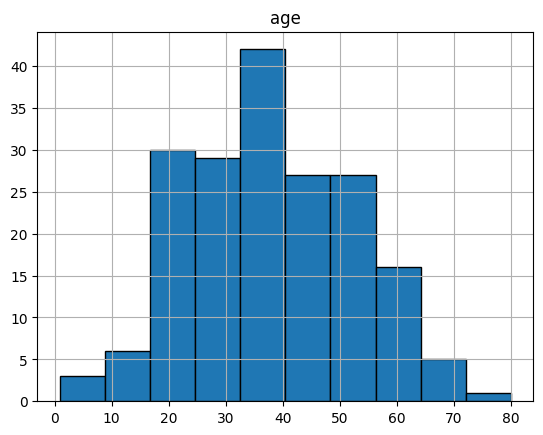

In [28]:
sub_df = df[ df['class'] == 'First' ] #subconjunto de dados com passageiros da primeira classe
sub_df.hist('age', ec='black') #histograma de idades dos passageiros da primeira classe

In [16]:
df['age'].groupby(df['pclass']).mean() #idade média dos passageiros por classe

pclass
1    38.233441
2    29.877630
3    25.140620
Name: age, dtype: float64

In [10]:
#Os passageiros da terceira classe eram mais jovens que os da primeira classe?

#Sim, olhando a tabela acima podemos ver que a idade média dos passageiros da terceira classe é menor que a idade média dos passageiros da primeira classe


pclass
1    38.233441
2    29.877630
3    25.140620
Name: age, dtype: float64

## 📝 Desafio 5: Sobrevivência no Titanic 🚑

1. **Quem teve maior chance de sobrevivência?**  
   - Homens ou mulheres?  
   - Passageiros da primeira ou da terceira classe?  


In [29]:
#df['survived'].groupby(df['sex']).mean() #proporção de sobreviventes por sexo

#Quem teve mais chances de sobreviver, homens ou mulheres?

#dataframe, groupby, coluna, 'sex', 'survived', média
df.groupby('sex')['survived'].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [30]:
#Passageiros da primeira ou terceira classe?

#df['survived'].groupby(df['pclass']).mean() #proporção de sobreviventes por classe
df.groupby('pclass')['survived'].mean()

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64

## 📝 Desafio 6: Passageiros sozinhos tiveram menos chances de sobreviver?

1. **Crie uma nova coluna chamada 'viajou_sozinho'**  
   - Considere que uma pessoa estava sozinha se `sibsp == 0` e `parch == 0`.  
2. **Compare a taxa de sobrevivência entre passageiros que viajaram sozinhos e os que estavam acompanhados.**  


In [35]:
df['viajou_sozinho'] = (df['sibsp'] == 0) & (df['parch'] == 0)
print(df['viajou_sozinho'].value_counts())

viajou_sozinho
True     537
False    354
Name: count, dtype: int64


In [ ]:
#Outra solução
df['viajou_sozinho2'] = df['sibsp'] + df['parch']
df['viajou_sozinho2'] = df['viajou_sozinho2'].apply(lambda x: 1 if x == 0 else 0)
print(df['viajou_sozinho2'].value_counts())

viajou_sozinho2
1    537
0    354
Name: count, dtype: int64


In [34]:
df['survived'].groupby(df['viajou_sozinho']).mean() #proporção de sobreviventes por quem viajou sozinho


viajou_sozinho
False    0.505650
True     0.303538
Name: survived, dtype: float64

In [37]:
df.groupby('viajou_sozinho')['survived'].mean() #proporção de sobreviventes por quem viajou sozinho

viajou_sozinho
False    0.505650
True     0.303538
Name: survived, dtype: float64

## 📝 Desafio 7: O ponto de embarque influenciava o preço da passagem?

1. **Qual era o preço médio das passagens em cada ponto de embarque (`embark_town`)?**  
2. **Os passageiros que embarcaram em um lugar específico pagaram mais do que os outros?**  


In [21]:
df['embark_town'].value_counts() #cidades de embarque

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [20]:
df['fare'].groupby(df['embark_town']).mean() #preço médio da passagem por cidade de embarque

embark_town
Cherbourg      59.954144
Queenstown     13.276030
Southampton    27.079812
Name: fare, dtype: float64

In [38]:
df.groupby('embark_town')['fare'].mean() #preço médio da passagem por cidade de embarque

embark_town
Cherbourg      59.954144
Queenstown     13.276030
Southampton    27.079812
Name: fare, dtype: float64

In [39]:
#Preço máximo da passagem por cidade de embarque

df.groupby('embark_town')['fare'].max()

embark_town
Cherbourg      512.3292
Queenstown      90.0000
Southampton    263.0000
Name: fare, dtype: float64

In [ ]:
#Quantos passageiros por classe embarcaram em cada cidade?

df.groupby(['embark_town', 'pclass']).size()


embark_town  pclass
Cherbourg    1          85
             2          17
             3          66
Queenstown   1           2
             2           3
             3          72
Southampton  1         127
             2         164
             3         353
dtype: int64

In [41]:
#Qual é a proporção de cada classe na cidade Cherbourg

df[df['embark_town'] == 'Cherbourg']['pclass'].value_counts(normalize=True)


pclass
1    0.505952
3    0.392857
2    0.101190
Name: proportion, dtype: float64

## 📝 Desafio 8: Como eram as famílias dos passageiros? 👨‍👩‍👧‍👦

1. **Crie uma nova coluna chamada 'tamanho_familia'**, que seja a soma de `sibsp` e `parch`.  
2. **Qual era o tamanho médio das famílias?**  
3. **Havia relação entre tamanho da família e sobrevivência?**  


In [46]:
df['tamanho_family'] = df['sibsp'] + df['parch'] + 1 #tamanho da família, pois o valor zero diz que a pessoa estava sozinha
df['tamanho_family'].value_counts()

tamanho_family
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

In [47]:
df['tamanho_family'].mean()

1.904601571268238

In [53]:
#Relação entre tamanho da familia e sobrevivencia

df['survived'].groupby(df['tamanho_family']).mean()

tamanho_family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: survived, dtype: float64

In [51]:
# Relação entre tamanho da família e sobrevivência

df.groupby('tamanho_family')['survived'].count()

tamanho_family
1     537
2     161
3     102
4      29
5      15
6      22
7      12
8       6
11      7
Name: survived, dtype: int64

In [55]:
#usar o round para aproximar valores do groupby
#gerar o histograma
